# Linear Regression and Scikit-Learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use("./deeplearning.mplstyle")

In [3]:
# Load dataset
X_train, y_train = load_house_data()
X_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

In [10]:
# Scale/Normalize

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [21]:
# Create/fit the regression model
sgdr= SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(sgdr.n_iter_)
print(sgdr.t_)

SGDRegressor()
104
10297.0


In [22]:
# View Parameters

b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(w_norm, b_norm)

[109.74 -20.86 -32.22 -38.09] [363.14]


In [26]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm

print((y_pred_sgd == y_pred).all())
print(y_pred[:4])
print(y_train[:4])

True
[295.18 485.8  389.67 491.96]
[300.  509.8 394.  540. ]


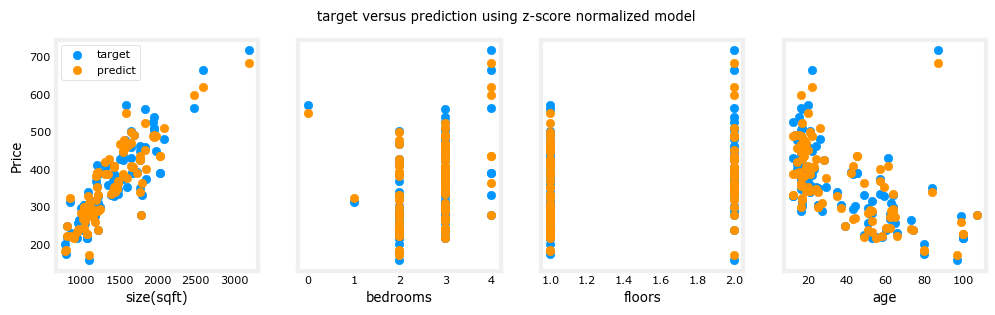

In [29]:
fig, ax = plt.subplots(1,4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i], y_pred, color=dlc['dlorange'], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()